In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

In [2]:
results_df = pd.read_csv('./results/weights_lin_pred.csv')
results_df

,model_name,layer_name,forward_lin_pred,forward_best_alpha,backward_lin_pred,backward_best_alpha,RSA_pearson
0,vgg16_xavier_n_seed2,features.23,1.675142e-01,1000.0,0.674665,1.000000e-08,0.133390
1,vgg16_xavier_n_seed2,features.30,1.662318e-01,1000.0,0.619471,1.000000e-08,0.161484
2,vgg16_xavier_n_seed2,classifier.0,1.736008e-01,10000.0,0.463305,1.000000e+03,0.130129
3,vgg16_xavier_n_seed2,classifier.3,6.784111e-02,100000.0,0.060278,6.400000e+05,0.076201
4,vgg16_trained_seed0,features.23,3.302749e-01,1000.0,0.688613,1.000000e+03,0.378800
...,...,...,...,...,...,...,...
283,vgg16_constant_seed0,classifier.3,7.427378e-21,4020.0,0.000000,1.000000e-08,NaN
284,vgg16_orthogonal_seed2,features.23,1.670830e-01,1000.0,0.688393,1.000000e-08,0.152144
285,vgg16_orthogonal_seed2,features.30,1.699438e-01,1000.0,0.659243,1.000000e-08,0.147208
286,vgg16_orthogonal_seed2,classifier.0,1.829812e-01,10000.0,0.510709,1.000000e+03,0.164976


In [95]:
model_names = pd.unique(results_df['model_name'])
model_names = np.unique([mn.split('_seed')[0] for mn in model_names])
layer_names = pd.unique(results_df['layer_name'], )
# collect neural preds across model seeds
model_seed_linpred = {}
model_seed_rsa = {}
# model_seed_linpred[model][layer] = [linpred_seed1, ... linpred_seed10]

for mn in list(model_names):
    mn = str(mn)
    mn_seed_indices = results_df.index[results_df['model_name'].str.startswith(mn)].tolist()
    for mn_seed_ind in mn_seed_indices:
        layer_name = results_df.iloc[mn_seed_ind]['layer_name']
        forward_linpred = results_df.iloc[mn_seed_ind]['forward_lin_pred']
        backward_linpred = results_df.iloc[mn_seed_ind]['backward_lin_pred']
        rsa_score = results_df.iloc[mn_seed_ind]['RSA_pearson']

        # init model_name in dict
        if mn not in list(model_seed_linpred.keys()):
            model_seed_linpred[mn] = {}
            model_seed_rsa[mn] = {}

        # init layer_name in mn sub-dict
        if layer_name not in list(model_seed_linpred[mn].keys()):
            model_seed_linpred[mn][layer_name] = []
            model_seed_rsa[mn][layer_name] = []
            
        model_seed_linpred[mn][layer_name].append([forward_linpred,backward_linpred])
        model_seed_rsa[mn][layer_name].append(float(rsa_score))
                                                
        
    

In [8]:
#CAREFUL: RSA scores for constant and uniform seeds seem to have RSA nans because of constant activations across stimuli

In [99]:
model_seed_linpred[model_names[1]]

{'features.23': [[np.float64(0.162554989464866),
   np.float64(0.6383940751345647)],
  [np.float64(0.167471967515568), np.float64(0.6678938509101275)],
  [np.float64(0.1653351566003322), np.float64(0.6811599373370477)],
  [np.float64(0.163307895843118), np.float64(0.7022088985087932)],
  [np.float64(0.1643329172556087), np.float64(0.6601853921265419)],
  [np.float64(0.1633992843086915), np.float64(0.6843302641702803)],
  [np.float64(0.1674594500036628), np.float64(0.6615238652902022)],
  [np.float64(0.1660286528627732), np.float64(0.6573535713000178)],
  [np.float64(0.1674107185868664), np.float64(0.6823069895476866)],
  [np.float64(0.1711414962848992), np.float64(0.6736323355659389)]],
 'features.30': [[np.float64(0.1625408010218735),
   np.float64(0.615896167674267)],
  [np.float64(0.1656138845366465), np.float64(0.6193666209669173)],
  [np.float64(0.1620482601589672), np.float64(0.6394620025702398)],
  [np.float64(0.1683690899531383), np.float64(0.6559784333977278)],
  [np.float64(0

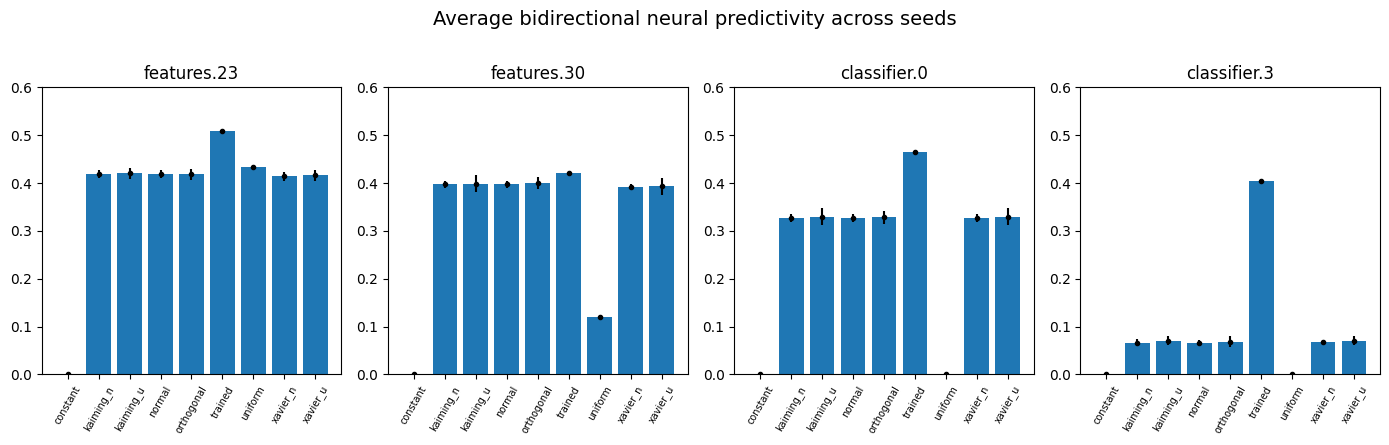

In [156]:
# 2x2 subplot of lin preds across different inits for (4 layers)
plt.figure(figsize=(14,4))

for pi in range(1,5):
    plt.subplot(1,4,pi)
    ln = layer_names[pi-1]
    plt.title(ln)
    plot_x = [mn.split('_', 1)[1] if '_' in mn else mn for mn in model_names]
    
    plot_y = []
    y_sd = []
    for mn in model_names:
        plot_y.append(np.mean(np.mean(model_seed_linpred[mn][ln], axis=1)))
        y_sd.append(np.std(np.mean(model_seed_linpred[mn][ln], axis=1)))
    
    plt.bar(plot_x, plot_y)
    plt.errorbar(plot_x, plot_y, y_sd, fmt=".", color='k')
    plt.xticks(rotation=60, fontsize=7)
    plt.ylim([0, 0.6])
    


plt.tight_layout()
plt.suptitle("Average bidirectional neural predictivity across seeds", fontsize=14, y=1.1)
plt.show()

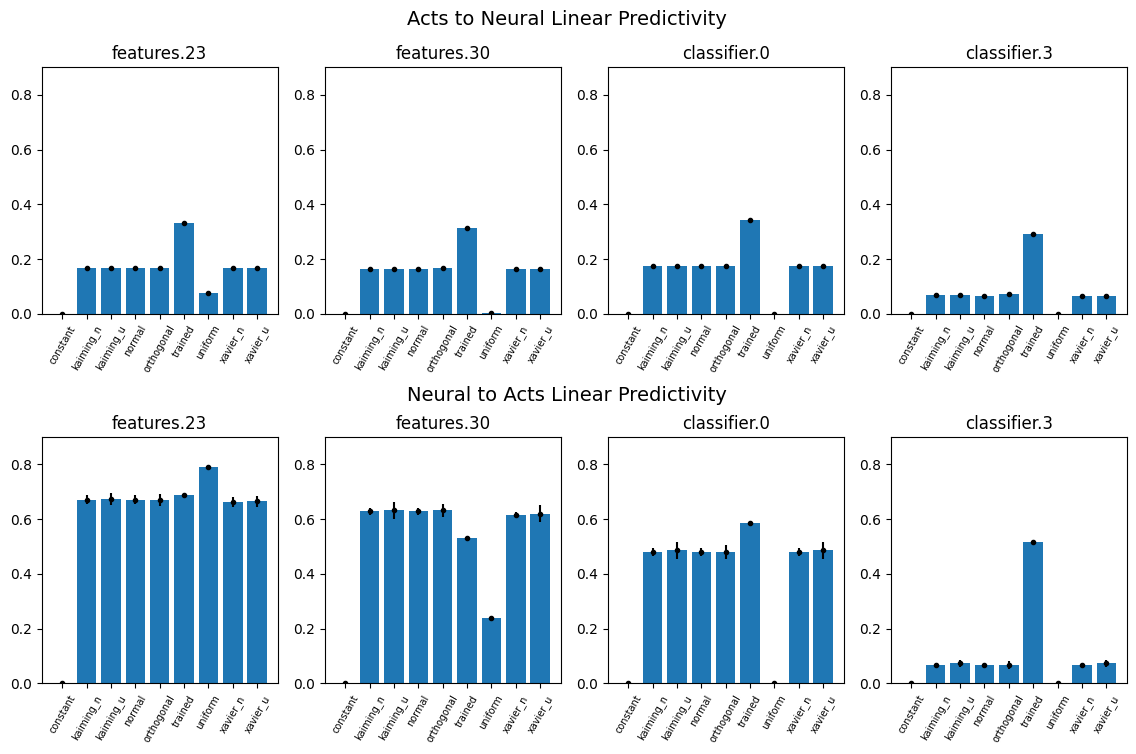

In [155]:
# 2x2 subplot of lin preds across different inits for (4 layers) [
fig = plt.figure(figsize=(14,8))

for pi in range(1,5):
    plt.subplot(2,4,pi)
    ln = layer_names[pi-1]
    plt.title(ln)
    plot_x = [mn.split('_', 1)[1] if '_' in mn else mn for mn in model_names]
    
    plot_y = []
    y_sd = []
    for mn in model_names:
        plot_y.append(np.mean(model_seed_linpred[mn][ln], axis=0)[0])
        y_sd.append(np.std(model_seed_linpred[mn][ln], axis=0)[0])
    
    plt.bar(plot_x, plot_y)
    plt.errorbar(plot_x, plot_y, y_sd, fmt=".", color='k')
    plt.xticks(rotation=60, fontsize=7)
    plt.ylim([0, 0.9])
    

for pi in range(1,5):
    plt.subplot(2,4,pi+4)
    ln = layer_names[pi-1]
    plt.title(ln)
    plot_x = [mn.split('_', 1)[1] if '_' in mn else mn for mn in model_names]
    
    plot_y = []
    y_sd = []
    for mn in model_names:
        plot_y.append(np.mean(model_seed_linpred[mn][ln], axis=0)[1])
        y_sd.append(np.std(model_seed_linpred[mn][ln], axis=0)[1])
    
    plt.bar(plot_x, plot_y)
    plt.errorbar(plot_x, plot_y, y_sd, fmt=".", color='k')
    plt.xticks(rotation=60, fontsize=7)
    plt.ylim([0, 0.9])
    

# plt.suptitle("Average bidirectional neural predictivity across seeds", fontsize=12, y=1)
fig.text(0.5, 0.94, 'Acts to Neural Linear Predictivity', ha='center', va='center', fontsize=14)
fig.text(0.5, 0.47, 'Neural to Acts Linear Predictivity', ha='center', va='center', fontsize=14)
# plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

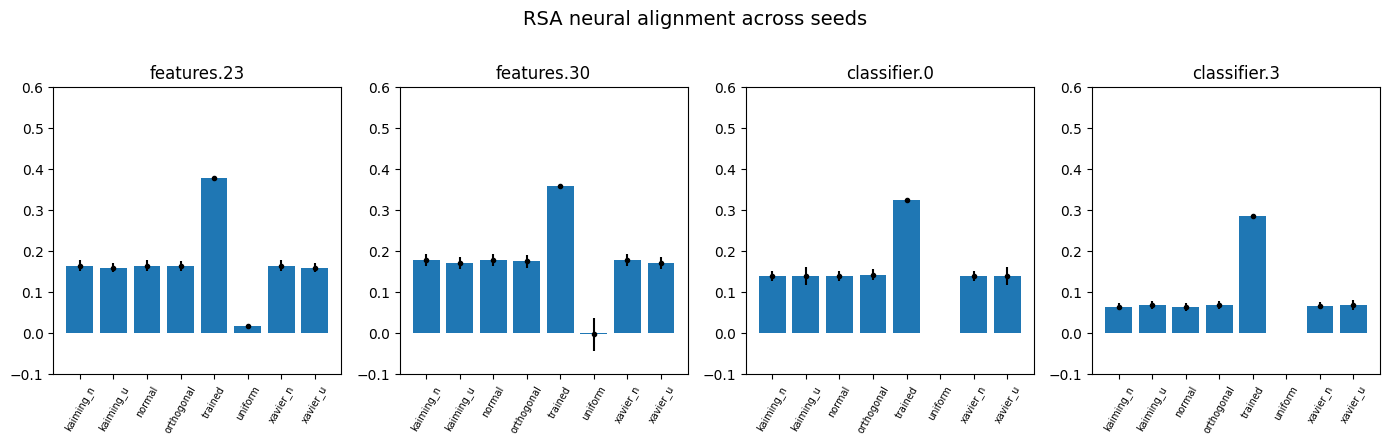

In [162]:
# 2x2 subplot of lin preds across different inits for (4 layers)
plt.figure(figsize=(14,4))

for pi in range(1,5):
    plt.subplot(1,4,pi)
    ln = layer_names[pi-1]
    plt.title(ln)
    plot_x = [mn.split('_', 1)[1] if '_' in mn else mn for mn in model_names]
    
    plot_y = []
    y_sd = []
    for mn in model_names:
        plot_y.append(np.mean(model_seed_rsa[mn][ln]))
        y_sd.append(np.std(model_seed_rsa[mn][ln]))
    
    plt.bar(plot_x, plot_y)
    plt.errorbar(plot_x, plot_y, y_sd, fmt=".", color='k')
    plt.xticks(rotation=60, fontsize=7)
    plt.ylim([-0.1, 0.6])
    


plt.tight_layout()
plt.suptitle("RSA neural alignment across seeds", fontsize=14, y=1.1)
plt.show()